In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Built-in Functions
- full list: https://docs.python.org/library/functions.html

In [2]:
max(19, 20)

20

In [3]:
print('foobar')

foobar


In [4]:
str(22)

'22'

In [5]:
type(22)

int

## Defining Functions

In [7]:
# Basic Syntax
# Suppose we want to make a function that does f(x) = 2x + 1
def f(x):
    return 2*x + 1

print(f(1), f(20))

3 41


In [ ]:
# Suppose now we want to compute the absolute value of a given number

def new_abs_function(x):
    if x < 0: 
        abs_value = -x
    else:
        abs_value = x
    return abs_value

print(new_abs_function(-20))

# You can have arbitrarily many return statements but it is typically discouraged since it can make logic hard to follow

20


### Keyword Arguments

#plt.plot(x, 'b-', label = 'white noise')
- In this plot function, the last argument is passed in 'name = argument' syntax
    - this is a keyword argument with label being the keyword
- Non-keyword arguments are called positional arguments since their meaning is determined by order where
    - plot(x, 'b-') differs from plot('b-', x)
- Keyword arguments are particularly useful when a function has a lot of arguments, in which case it's hard to remember the right order


In [12]:
def f(x, a=1, b=1):
    return a + b * x
f(2)
f(2, a = 4, b = 5)

14

### Flexibility of Python Functions
- Any number of functions can be defined in a given file
- Functions can be defined inside other functions
- Any object can be passed to a function as an argument including other functions
- A function can return any kind of object, including functions

In [ ]:
# One-Line Functions
# The lambda keyword is used to create simple functions on one line

def f(x):
    return x**3

# is the same as 

f = lambda x: x**3

Suppose we want to get the integral of x<sup>3</sup> from 0 to 2. We can use SciPy's quad function that will calculate this for us. It has syntax quad(f, a, b) where f is a function, and a and b are numbers. To create the function f(x) = x<sup>3</sup>, we can use lambda.

In [13]:
from scipy.integrate import quad

quad(lambda x: x**3, 0, 2)

(4.0, 4.440892098500626e-14)

### Why write functions?
User-defined functions are important for improving the clarity of your code by:
- separating different strands of logic
- facilitating code reuse

## Applications

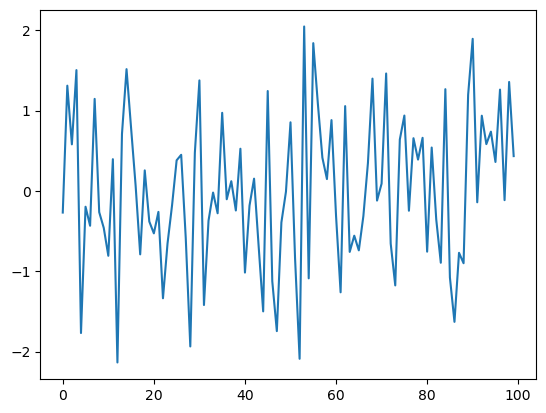

In [14]:
# Random Draws
ts_length = 100
ε_values = [] # empty list

for i in range(ts_length):
    e = np.random.randn()
    ε_values.append(e)

plt.plot(ε_values)
plt.show()

### We can break this code into 2 parts:
1. A user-defined function that generates a list of random variables
2. The main part of the program that:
    - Calls this function to get data
    - Plots the data


<function matplotlib.pyplot.show(close=None, block=None)>

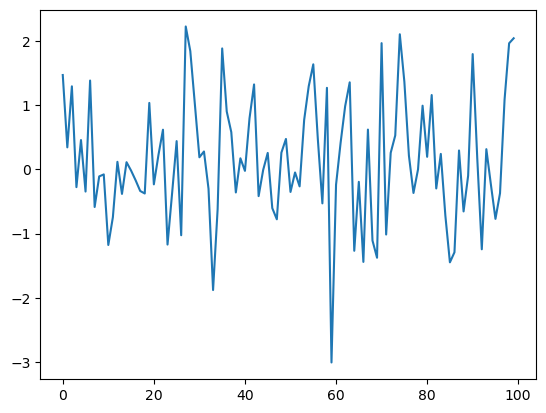

In [15]:
def generate_data(n):
    ε_values = []
    for i in range(n):
        e = np.random.randn()
        ε_values.append(e)
    return ε_values

data = generate_data(100)
plt.plot(data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

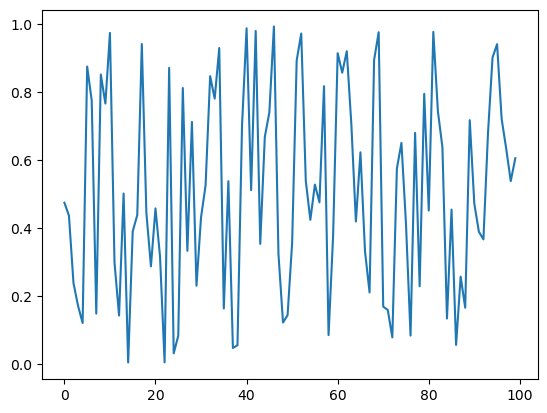

In [17]:
# Adding conditions
# Let's expand the previous function by giving it the ability to return either standard normals or uniform random variables on (0,1) as required

def generate_data(n, generator_type):
    ε_values = []
    for i in range(n):
        if generator_type == 'U':
            e = np.random.uniform(0, 1)
        else:
            e = np.random.randn()
        ε_values.append(e)
    return ε_values

data = generate_data(100, 'U')
plt.plot(data)
plt.show

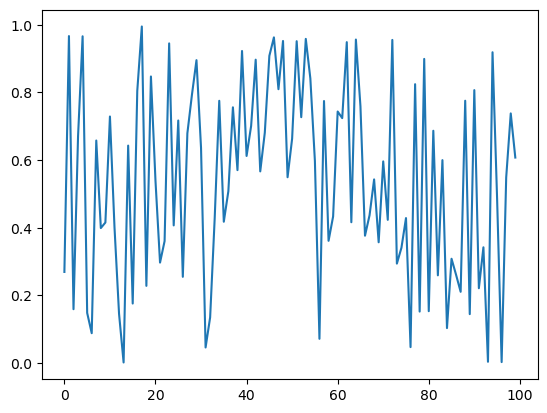

In [ ]:
# We could simplify the code above. For example we could get rid of the conditionals by just passing the desired generator type as a function

def generate_data(n, generator_type):
    ε_values = []
    for i in range(n):
        e = generator_type()
        ε_values.append(e)
    return ε_values

data = generate_data(100, np.random.uniform)
plt.plot(data)
plt.show()

# When we pass np.random.uniform, this object is a function
# When the function call generate_data(100, np.random.uniform) is executed, Python runs the function code block with n = 100 and the generator_type is bound to the function np.random.uniform
    # While these lines are executed, the names generator_type and np.random.uniform are synonyms and can be used in identical ways as shown in the next cell

In [19]:
max (7, 2, 4)

m = max

m(7, 2, 4)

7

## Recursive Function Calls
A recursive function is a function that calls itself. For example, consider the problem of computing x<sub>t</sub> for some t when:
$x_{t+1} = 2x_t, x_0 = 1$. The answer is obviously $2^t$ and we can compute this easily using a loop.

In [20]:
def x_loop(t):
    x = 1
    for i in range(t): 
        x = 2 * x
    return x

In [21]:
# We can also use the recursive solution below
def x(t):
    if t == 0:
        return 1
    else:
        return 2 * x(t-1)

In [ ]:
# Exercises

# 4.1 

def factorial(n):
    k = 1
    for i in range(n):
        k = k * (i + 1)
    return k

factorial(3)

# Mistake made: I instead tried to make a while loop involving an empty list stuff, I'd then add each n into that list and subtract it by one. Once n = 0, I created a for loop where for i in stuff, stuff[i] * stuff[i-1] which didn't work. My primary mistake was forgetting that python variables can be defined by its current value and some transformation, allowing for an easier function for factorials.
        

6

In [ ]:
# 4.2

from numpy.random import uniform 

def binomial_rv(n, p):
    count = 0
    for i in range(n):
        u = uniform()
        if u < p:
            count = count + 1
    return count

binomial_rv(10, 0.5)

# Mistake made: I had no idea where to start, I wasn't sure what 1 draw of Y meant and so I gave up immediately.

4

In [22]:
# 4.3.1

from numpy.random import uniform

def draw(k): # pays if k consecutive successes in a sequence

    payoff = 0
    count = 0

    for i in range(10):
        u = uniform()
        count = count + 1 if u < 0.5 else 0
        print(count)
        if count >= k:
            payoff = 1
    return payoff
        
draw(3)

# Mistake made: I don't know how to code the consecutive condition.


1
2
0
1
0
1
0
1
0
0


0

In [23]:
def draw_new(k): # pays if k successes in a sequence
    
    payoff = 0
    count = 0

    for i in range(10):
        u = uniform()
        count = count + ( 1 if u < 0.5 else 0 )
        print(count)
        if count >= k:
            payoff = 1
    return payoff

draw_new(3)

0
1
1
2
2
3
4
4
5
5


1

In [ ]:
# 4.4

def x(t):
    if t == 0:
        return 0
    elif t == 1: 
        return 1
    else: 
        return x(t-1) + x(t-2)
    
print([x(i) for i in range(10)])

# Mistake made: Forgot about recursive defining the values of x, and that their index is with parenthesis

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [ ]:
# 4.5

def recursion_factorial(n):
    if n == 1:
        return n
    else:
        return n * recursion_factorial(n-1)
    
# Mistake made: Forgot that you can use the function itself in the definition of a function